99021
Val Error


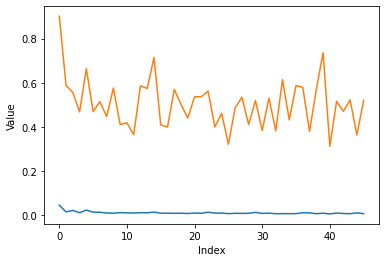

Last Validation Set


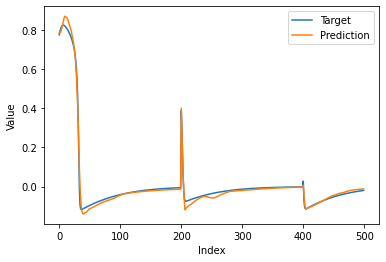

0.0062517356


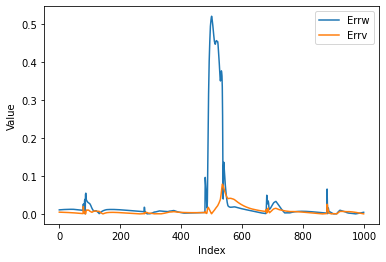

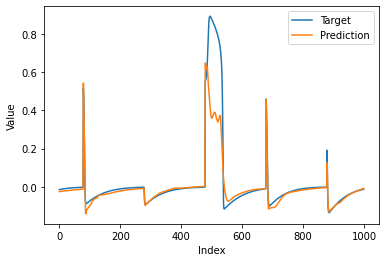

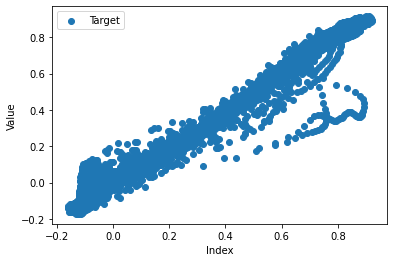

In [135]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
def plot_results(file_path):
    with h5py.File(file_path+"Val.h5", 'r') as hf:
        target = hf['target'][:]
        pred = hf['pred'][:]
            
    with h5py.File(file_path+"Val_err.h5", 'r') as hf:
        err = hf['error_stats'][:]
    window_size =500
    absolute_error =np.abs(target - pred)

    max_error_index = np.argmax(absolute_error.T[0])
    print(max_error_index)
   

    # Plot target and prediction around the region of maximum error
    start_index = max(0, max_error_index - window_size)
    end_index = min(len(target), max_error_index + window_size)

    print("Val Error")
    plt.plot(err)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()
    
    print("Last Validation Set")
    plt.plot(target[:window_size, 0])
    plt.plot(pred[:window_size, 0])
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend(['Target', 'Prediction'])
    plt.show()

    print(np.mean(absolute_error))
    plt.plot(absolute_error[start_index:end_index])
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend(['Errw', 'Errv'])
    plt.show()
    
   

# Find index of maximum error
  
    plt.plot(target[start_index:end_index, 0], label='Target')
    plt.plot(pred[start_index:end_index, 0], label='Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    
    plt.scatter(target,pred)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend(['Target', 'Prediction'])
    plt.show()

# Call the plot_results function with the path to your HDF5 file
file_path = "trainer/"
plot_results(file_path)

max e(rr region:  0.66867423 0.7583762 0.10162115 2.1
max err 0.37846708
mean err 0.006539506837725639


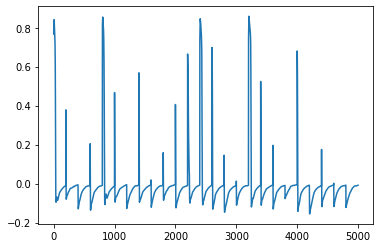

IAPP 0.7565807
W0 0.102071114
U0 0.8406985


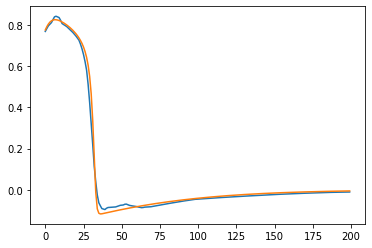

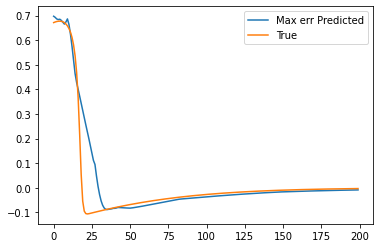

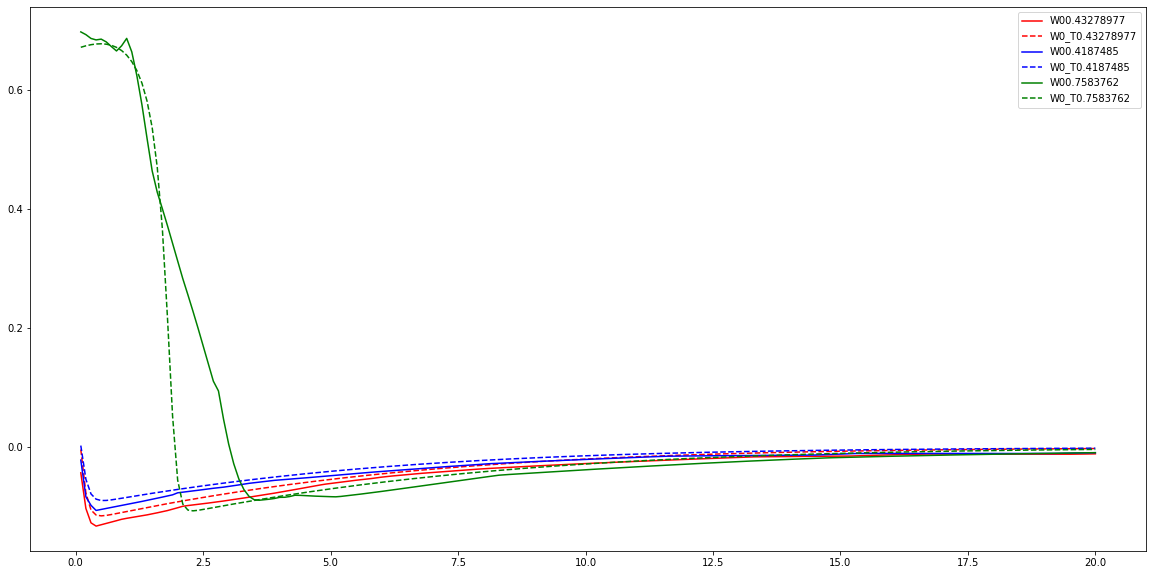

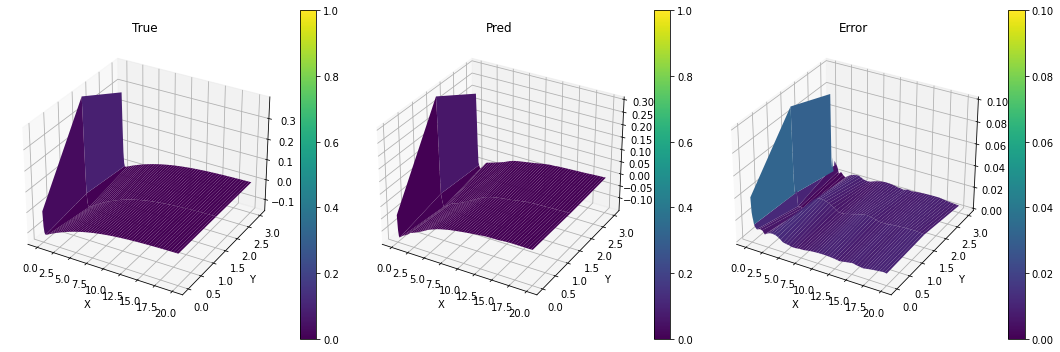

abc


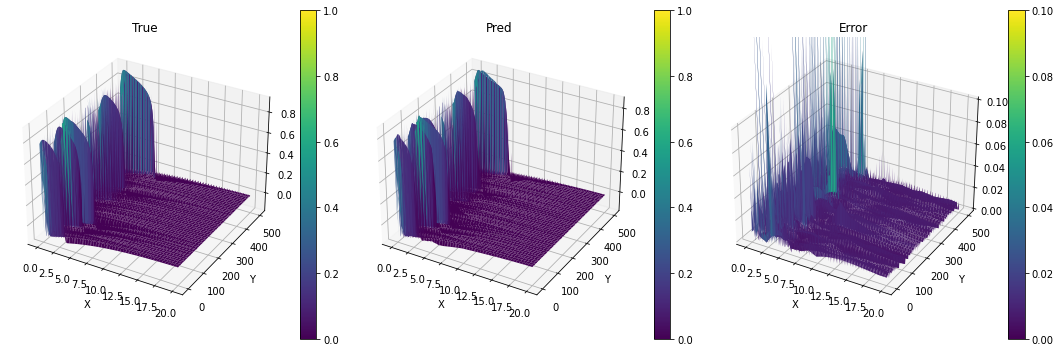

In [102]:
import operator
colors=["red","blue","green","orange","red","blue","green","yellow","orange"]

with h5py.File(file_path+"val.h5", 'r') as hf:
        T,U,V,K = np.array(hf['input']).T
        TX,TW = np.array(hf['target']).T
        X,W    =np.array(hf['pred']).T
        


    
E= ((X-TX)**2)**0.5


ae,m= max(enumerate(E), key=operator.itemgetter(1))
print("max e(rr region: ",K[ae],U[ae],V[ae],T[ae])
print("max err",(np.max( ((X-TX)**2)**0.5) ))
print("mean err",(np.mean(X-TX)**2)**0.5)

e=lambda x:np.expand_dims(x,axis=1)


nc=len(U)//len(np.unique(T))

d=0

pred_u= np.reshape(X, (nc,len(X)//nc))
true_u= np.reshape(TX, (nc,len(X)//nc))
ks,us,vs=np.reshape(K, (nc,len(X)//nc)),np.reshape(U, (nc,len(X)//nc)),np.reshape(V, (nc,len(X)//nc))


k=3
plt.plot(X[0:5000])
plt.show()


N=0
print("IAPP",ks[N][1])
print("W0",vs[N][1])
print("U0",us[N][1])
plt.plot(pred_u[N])
plt.plot(true_u[N])
#print(true_u[N])


#############################################################################
plt.show()


max_error = float('-inf')
max_error_solution = None

for N in range(len(ks)):
  

    # Assuming pred_u and true_u are lists of predicted and true values for each solution
    current_error = np.max(np.abs(pred_u[N]- true_u[N]))


    # Update max_error_solution if the current solution has a higher error
    if current_error > max_error:
        max_error = current_error
        max_error_solution = N

# Plot the solution with the maximum error
if max_error_solution is not None:
    plt.plot(pred_u[max_error_solution], label="Max err Predicted")
    plt.plot(true_u[max_error_solution], label="True")
    plt.legend()
    plt.show()

####################################################

u_k=np.unique(ks)
u_v=np.unique(vs)
u_u=np.unique(us)



#Ns=[i for i in range(nc) if  np.any(vs[i][10] ==u_v[8:11]) and ks[i][10]==u_k[6] and us[i][10]==u_u[2]]
Ns=[100,222,max_error_solution]
plt.figure(figsize=(20, 10))
for i,N in enumerate(Ns):
    #print("IAPP",ks[N][1])
    #print("W0",vs[N][1])
    #print("U0",us[N][1])
    plt.plot(T[0:len(X)//nc],pred_u[N],label="W0"+str(us[N][1]),color=colors[i])
    plt.plot(T[0:len(X)//nc],true_u[N],"--",label="W0_T"+str(us[N][1]),color=colors[i])

plt.legend(loc="best")
plt.show()


Ns=[100,333,55]


data=pred_u[Ns,:]
datat=true_u[Ns,:]
datae=np.abs(true_u[Ns,:]-pred_u[Ns,:])

# Create a meshgrid for X and Y values
x = np.linspace(0, T[-1], np.shape(data)[1])
y = np.linspace(0, len(Ns), np.shape(data)[0])
X, Y = np.meshgrid(x, y)

# Create a figure and 3D Axes objects for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})





# Plot the surface color plots on each subplot
surfs = []
data_arrays = [datat, data, datae]
plot_titles = ['True', 'Pred', 'Error']
mi,ma=0,1
for i, ax in enumerate(axs):
    if(i==2):
        ax.set_zlim(0,0.1) 
        mi,ma=0,0.1
        
    surf = ax.plot_surface(X, Y, data_arrays[i], cmap='viridis',vmin=mi,vmax=ma)
    surfs.append(surf)
    ax.set_title(plot_titles[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Value')
    fig.colorbar(surf, ax=ax)
    if(i==2):
        ax.set_zlim(0,0.1) 
# Show the multi-plot
plt.tight_layout()
plt.show()

print("abc")


Ns=range(0,nc)

#Ns=range(200,250)
data=pred_u[Ns,:]
datat=true_u[Ns,:]
datae=np.abs(true_u[Ns,:]-pred_u[Ns,:])





# Create a meshgrid for X and Y values
x = np.linspace(0, T[-1], np.shape(data)[1])
y = np.linspace(0, len(Ns), np.shape(data)[0])
X, Y = np.meshgrid(x, y)

# Create a figure and 3D Axes objects for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})

# Plot the surface color plots on each subplot
surfs = []
data_arrays = [datat, data, datae]
plot_titles = ['True', 'Pred', 'Error']
mi,ma=0,1
for i, ax in enumerate(axs):
    if(i==2):
        ax.set_zlim(0,0.1) 
        mi,ma=0,0.1
        
    surf = ax.plot_surface(X, Y, data_arrays[i], cmap='viridis',vmin=mi,vmax=ma)
    surfs.append(surf)
    ax.set_title(plot_titles[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Value')
    fig.colorbar(surf, ax=ax)

# Show the multi-plot
plt.tight_layout()
plt.show()
        